In [1]:
import pandas as pd
import numpy as np
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/rspeare/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [291]:
north_pole = [90.,0.]
weight_limit = 1000.
sleigh_weight = 10.

In [1064]:
def weighted_trip_length(stops, weights): 
    tuples = [tuple(x) for x in stops.values]
    # adding the last trip back to north pole, with just the sleigh weight
    tuples.append(north_pole)
    weights.append(sleigh_weight)
    
    dist = 0.0
    prev_stop = north_pole
    prev_weight = sum(weights)
    for location, weight in zip(tuples, weights):
        dist = dist + haversine(location, prev_stop) * prev_weight
        prev_stop = location
        prev_weight = prev_weight - weight
    if (np.sum(weights)> weight_limit):
        return np.inf
    else:
        return dist

def weighted_reindeer_weariness(all_trips):
    uniq_trips = all_trips.TripId.unique()
    
    if any(all_trips.groupby('TripId').Weight.sum() > weight_limit):
        raise Exception("One of the sleighs over weight limit!")
 
    dist = 0.0
    for t in uniq_trips:
        this_trip = all_trips[all_trips.TripId==t]
        dist = dist + weighted_trip_length(this_trip[['Latitude','Longitude']], this_trip.Weight.tolist())
    
    return dist    

In [1065]:
gifts = pd.read_csv('gifts.csv')
sample_sub = pd.read_csv('sample_submission.csv')

all_trips = sample_sub.merge(gifts, on='GiftId')

In [293]:
naive_score=weighted_reindeer_weariness(all_trips)

In [1066]:
best_score=12395765387.87850
print(naive_score,best_score)

144525525772.0 12395765387.8785


In [1056]:
s.iloc[[1]]

,GiftId,Latitude,Longitude,Weight
0,-1,90,0,0


# Initializiaton: Setup stops, Check for Validity

In [1078]:
# Add lots of 'north pole' stops, concatenate them to the original gifts data frame
def initialize(frac):
    notValid=True
    while (notValid):
        seed1=np.insert(north_pole,0,-1)
        seed1=np.insert(seed1,3,0.)
        s=pd.DataFrame(seed1,index=gifts.columns.values).T
        s.head()
        s=pd.DataFrame(seed1,index=gifts.columns.values).T
        for i in np.arange(np.log(len(gifts)*frac)/np.log(2.)):
            s=pd.concat([s,s])
        print(len(s))
    
        dfc=pd.concat([gifts,s])
        dfc.head()
        
        # Now randomly distribute the stops
        dfc=dfc.iloc[np.random.permutation(len(dfc))]
        dfc.head()
    
        stops=np.where(dfc['GiftId']==-1)[0]
        
        dfc['tripW']=np.zeros(len(dfc))
        dfc['TripId']=np.zeros(len(dfc))

        ###### CHECK IF A VALID SET OF STOPS
        cumWeights=[]
    
        np.insert(stops,0,0)
        np.insert(stops,len(stops),len(dfc)+1)
    
        tripWeight=np.sum(dfc['Weight'].values[:stops[0]])
        cumWeights.append(tripWeight)
        dfc['tripW'].values[:stops[0]]=tripWeight
        dfc['TripId'].values[:stops[0]]=0
        
        for i in np.arange(len(stops)-1):
    #    print(i)
            tripWeight=np.sum(dfc['Weight'].values[stops[i]:stops[i+1]])
            cumWeights.append(tripWeight)
            dfc['tripW'].values[stops[i]:stops[i+1]]=tripWeight
            dfc['TripId'].values[stops[i]:stops[i+1]]=i
        
        tripWeight=np.sum(dfc['Weight'].values[stops[-1]:])
        cumWeights.append(tripWeight)
        dfc['tripW'].values[stops[-1]:]=tripWeight
        dfc['TripId'].values[stops[-1]:]=i+1

        cumWeights=np.array(cumWeights)
        
        #####################################################
        
        if np.any(dfc['tripW'].values > 1000.-10.):
            print('Too much weight in the sleigh!')
            frac*=1.1
        else:
            print('legal set of stops')
            notValid=False
    if np.any(np.isnan(my_trips)):
        print('WARNING THERE ARE NAN TRIP IDS')
    #print('calculating initial score fraction...relative to Naive')
    return dfc


In [1113]:
def check_weights_valid(dfc):
    stops=np.where(dfc['GiftId']==-1)[0]
    cumWeights=[]
    
#    np.insert(stops,0,0)
#    np.insert(stops,len(stops),len(dfc)+1)
    
    tripWeight=np.sum(dfc['Weight'].values[:stops[0]])
    cumWeights.append(tripWeight)
    dfc['tripW'].values[:stops[0]]=tripWeight
    dfc['TripId'].values[:stops[0]]=0
        
    for i in np.arange(len(stops)-1):
    #    print(i)
        tripWeight=np.sum(dfc['Weight'].values[stops[i]:stops[i+1]])
        cumWeights.append(tripWeight)
        dfc['tripW'].values[stops[i]:stops[i+1]]=tripWeight
        dfc['TripId'].values[stops[i]:stops[i+1]]=i
        
    tripWeight=np.sum(dfc['Weight'].values[stops[-1]:])
    cumWeights.append(tripWeight)
    dfc['tripW'].values[stops[-1]:]=tripWeight
    dfc['TripId'].values[stops[-1]:]=i+1

    cumWeights=np.array(cumWeights)
    if np.any(dfc['tripW'].values > 1000.):
        print('Too much weight in the sleigh!')
        return False
    else:
        print('legal set of stops')
        return True

In [1120]:
np.amax([df0[df0['TripId']==i]['Weight'].sum() for i in df0['TripId']])

1498.6570756604499

(array([ 1631.,  1643.,  1668.,  1674.,  1621.,  1518.,  1740.,  1678.,
         1650.,  1561.]),
 array([  4.00000000e+00,   1.16419000e+04,   2.32798000e+04,
          3.49177000e+04,   4.65556000e+04,   5.81935000e+04,
          6.98314000e+04,   8.14693000e+04,   9.31072000e+04,
          1.04745100e+05,   1.16383000e+05]),
 <a list of 10 Patch objects>)

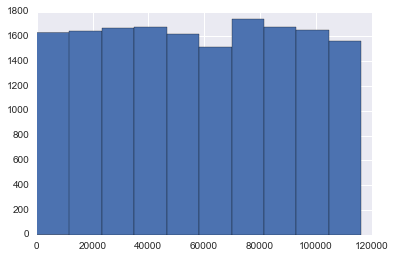

In [1112]:
plt.hist(np.where(df0['GiftId']==-1)[0])

# Two Opt Code: Swap two stops, see if valid and check for improvement

In [1079]:
def swap2(i,j,dfc):
    for attr in ['GiftId','Latitude','Longitude','Weight']:
        tmpi=dfc.iloc[i][attr]
        tmpj=dfc.iloc[j][attr]
        dfc.iloc[i][attr]=tmpj
        dfc.iloc[j][attr]=tmpi

In [1128]:
def propose_swap(dfc,Temp,lbound,hbound):
    """
    Propose a random Swap of two cities in the traveling salesmen problem
    """
    i1,i2=np.random.randint(lbound,high=hbound,size=2)
    trip0ID=dfc.iloc[i1]['TripId']
    trip1ID=dfc.iloc[i2]['TripId']

    w0=dfc.iloc[i1]['Weight']
    w1=dfc.iloc[i2]['Weight']
    
    trip0=dfc[dfc['TripId']==trip0ID]
    trip1=dfc[dfc['TripId']==trip1ID]
    

    dist1=weighted_trip_length(trip0[['Latitude','Longitude']], trip0.Weight.tolist())+weighted_trip_length(trip1[['Latitude','Longitude']], trip1.Weight.tolist())
    
    swap2(i1,i2,dfc)
    trip0ID=dfc.iloc[i1]['TripId']
    trip1ID=dfc.iloc[i2]['TripId']
    
    w0=dfc.iloc[i1]['Weight']
    w1=dfc.iloc[i2]['Weight']
    
    trip0=dfc[dfc['TripId']==trip0ID]
    trip1=dfc[dfc['TripId']==trip1ID]
    
    trip0['tripW']+=w1-w0
    trip1['tripW']-=w1-w0

    dist2=weighted_trip_length(trip0[['Latitude','Longitude']], trip0.Weight.tolist())+weighted_trip_length(trip1[['Latitude','Longitude']], trip1.Weight.tolist())

    if (dist2 < dist1):
#        print('accepted')
#        print(dist2-dist1)
        return (dist2 - dist1)
    else:
        prob=np.exp((dist1-dist2)/Temp)
        sample=np.random.rand()
        # Accept Swap with probability exp(-deltaD/T)
        if (sample < prob):
#            print('accepted with probability :',prob)
#            print(dist2-dist1)
            return (dist2 - dist1)
        else:
#            print('rejected with probability :',1.-prob)
            swap2(i1,i2,dfc)
            return 0.
    # should never get here
    return (dist2 - dist1)

In [1127]:
trip0['tripW']+=w2-w1
trip1['tripW']-=w2-w1


/Users/rspeare/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0        111.531017
97360    111.531017
89500    111.531017
10323    111.531017
99521    111.531017
92244    111.531017
62242    111.531017
74228    111.531017
41147    111.531017
Name: tripW, dtype: float64

In [1086]:
def running_mean(x,N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

# The Burn In Process

In [1074]:
df0=initialize(0.1)
weighted_reindeer_weariness(df0[all_trips.columns])/best_score

16384
Too much weight in the sleigh!
16384
Too much weight in the sleigh!
16384
legal set of stops


8.1424058485369581

In [1087]:
def burn_in(T,m,df,lbound,hbound):
    c=[]
    for i in np.arange(m):
        delta=propose_swap(df,Temp,lbound,hbound)
        c.append(delta)
    return np.array(c)

In [1090]:
Temp=10**5.0
len(df0)

23276.8

In [1091]:
m0=len(df0)#10000
count=0
var=100.

In [ ]:
count=0
var=5.01
m0=1000
print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
for n in np.arange(100):
    mu=burn_in(Temp,m0,df0,0,len(df0))
    var=np.std(mu/Temp)
    print('        equilibriation('+str(count)+')  var: '+str(var))
    score2=weighted_reindeer_weariness(df0[all_trips.columns])
    print(score2)
    if (var < 5.):
        Temp*=.9
        print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
        count=0
    else:
        count+=m0
#    plt.plot(mu/Temp)
#score2=weighted_reindeer_weariness(df0[all_trips.columns])
#print(score2/best_score)
plt.plot(mu/Temp)
#print(np.mean(mu/Temp),np.std(mu/Temp))
plt.show()

In [1129]:
df0.to_csv('santas_route_1.csv')

In [1031]:
score2=weighted_reindeer_weariness(df0[all_trips.columns])
print(score2/best_score)

6.60179278289


In [1004]:
# former score 7.36279912599,6.81
score2=weighted_reindeer_weariness(df0[all_trips.columns])
print(score2/best_score)

7.19265499438


In [ ]:
m0=500
window=50
deltaT=.01
t=6.

In [933]:
for nn in np.arange(100):
    mu=burn_in(10**t,m0,df0,0,len(df0))
    # equilibrum reached
    print('log(Temperature): '+str(t)+'; acceptance probability:'+str(len(mu)/m0)+'; mean correction: '+str(np.mean(mu)))
    if ((np.mean(mu) < 1.)):
        t-=deltaT

log(Temperature): 5.0...acceptance probability:0.03mean correction: 0.633157458085
log(Temperature): 4.99...acceptance probability:0.05mean correction: 0.419575638638
log(Temperature): 4.98...acceptance probability:0.056mean correction: 0.466781222867
log(Temperature): 4.970000000000001...acceptance probability:0.048mean correction: 0.321610997045
log(Temperature): 4.960000000000001...acceptance probability:0.046mean correction: 0.505829201243
log(Temperature): 4.950000000000001...acceptance probability:0.046mean correction: 0.549515077247
log(Temperature): 4.940000000000001...acceptance probability:0.032mean correction: 0.618809328607
log(Temperature): 4.9300000000000015...acceptance probability:0.042mean correction: 0.640549083314
log(Temperature): 4.920000000000002...acceptance probability:0.056mean correction: 0.4038819483
log(Temperature): 4.910000000000002...acceptance probability:0.044mean correction: 0.707050820525
log(Temperature): 4.900000000000002...acceptance probability:0.

KeyboardInterrupt: 

# Parellelized Burn in

In [ ]:
from IPython import parallel

rc = parallel.Client()
all_engines = rc[:]
lbv = rc.load_balanced_view()
lbv.block = True

In [ ]:
@lbv.parallel()
def f(x):
    return 10.0*x**4

In [ ]:
f.map(np.arange(10**2))

In [908]:
def power(base, exponent):
    return base ** exponent

from functools import partial

square = partial(power, exponent=2)
cube = partial(power, exponent=3)

def test_partials():
    assert square(2) == 4
    assert cube(2) == 8